Libraries + dataframe

In [2]:
import pandas as pd
import plotly.express as px
steam_dataframe = pd.read_csv("steam.csv")
video_game_dataframe = pd.read_csv("video_game.csv")

### What is the most played platform by year? 

In [3]:
def played_platform_by_year():
    colors = ['#1E90FF', '#B22222', '#3CB371', '#4682B4', '#CD853F', '#00BFFF', '#FF69B4', '#FA8072', '#90EE90', '#EE82EE', '#F4A460' , '#5F9EA0' , '#B0E0E6' , '#EEE8AA' , '#BA55D3' , '#7B68EE' , '#8B4513' , '#B0C4DE']

    video_game_dataframe=pd.read_csv('video_game.csv')

    dataset = video_game_dataframe.groupby(
        ['Platform', 'Year_of_Release']
    )['Global_players'].sum()

    # Save this dataset to a csv file
    dataset.to_csv('category_year.csv')

    # Read the csv file created
    df2 = pd.read_csv('category_year.csv')


    #df2.loc[df2['Global_players'] < 5, 'Platform'] = 'Other Platform with less than 5 millions players'
    fig=px.bar(df2,x='Year_of_Release',y='Global_players', color="Platform", color_discrete_sequence=colors )
    fig.write_html('played_platform_by_year.html', auto_open=True) 

played_platform_by_year()

# In the menu: you can put like:
# 1. What is the most played platform by year?
# Choose a range:
# 1980 - 1982   --> print Atari
# 1983 - 1995   --> print Ninetendo
# 1990 - 1995   --> print Super Ninetendo
# 1995 - 2000   --> print PS
# 2001 - 2005   --> print PS2
# 2006 - 2009   --> print Wii
# 2010          --> print X360
# 2011 - 2013   --> print PS3
# 2014 - 2016   --> print PS4


### What is the common words for videogames titles?

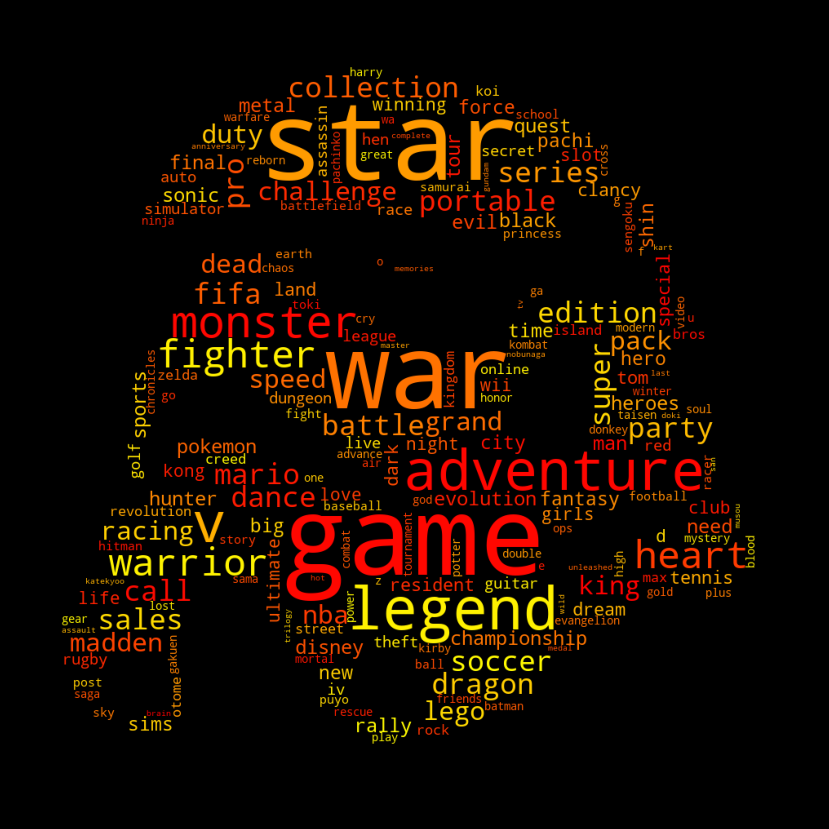

In [4]:
def common_words_videogames_title():
    # Function to get a list of words
    def process_words(text : str):
        import re
        text = text.lower()           # Convert the whole text to lower case
        text = re.sub(u"[-()\"#$/@;:<>{}`+=~|!?,\â€“”\*]|\[.*\]|\d{1,}th|\d{1,}s|\d{1,}'s|\d{1,}", " ", text)
        list_words = re.split('[-\s—]', text)  # Split string with multiple delimiters: - , \s, — 

        list_words = [ (eachWord.strip('.,“”!;()-[]?,):\n"')) for eachWord in list_words]     # Cleaning the words from . , ! ; () [] “ ” ? ' 
        list_words = [ (eachWord.replace("’s" , '')) for eachWord in list_words]    # Replace 's from words with ''
        list_words = [ (eachWord.replace("’ll" , '')) for eachWord in list_words]    # Replace 'll from words ''
        list_words = [ (eachWord.replace("’t" , '')) for eachWord in list_words]    # Replace 't from words ''
        list_words = [ (eachWord.replace("'s" , '')) for eachWord in list_words]    # Replace 's from words with ''
        list_words = [ (eachWord.replace("'ll" , '')) for eachWord in list_words]    # Replace 'll from words ''
        list_words = [ (eachWord.replace("'t" , '')) for eachWord in list_words]    # Replace 't from words ''
        list_words = list(filter(None, list_words))         # Filter Null values or empty strings from the List  
        return list_words

    # Function to get frequent words
    def freq_words(list_words : list):
        from collections import Counter
        # Filter out values: the, a, an
        unwanted = ('the', 'no', 'a', 'world', '&','ds','an','ni','ii','to','x','jp','vol','nfl','de','and','iii','of','we','that','in','our','is','it','for','i','or','do','this','on','who','not','but','us','as','are','their','so','be','if','by')
        list_words = [ words for words in list_words if words not in unwanted]

        # Counter module to count freq words        
        Counter = Counter(list_words)
        most_occur = Counter.most_common(300)
        words = ""
        for (word,repetition) in most_occur:
            words += word + " "
        return words


    # Plot wordCloud
    def wordCloud(text : str):
        # Import packages
        from wordcloud import WordCloud, STOPWORDS
        import numpy as np
        from PIL import Image
        import matplotlib.pyplot as plt

        mask = np.array(Image.open('starwars.png'))

        wordcloud = WordCloud(width = 1500, height = 1000, random_state=1, background_color='Black', colormap='autumn', collocations=False, stopwords = STOPWORDS, mask=mask).generate(text)
        
        # Set figure size
        plt.figure(figsize=(20, 15))
        # Display image
        plt.imshow(wordcloud) 
        # No axis details
        plt.axis("off")


    video_game_dataframe = pd.read_csv("video_game.csv")
    games_name_string = ""
    for index, row in video_game_dataframe.iterrows():
        string = str(row["Name"])
        games_name_string += string + " "

    games_name_list = process_words(games_name_string)
    most_freq_words = freq_words(games_name_list)

    wordCloud(most_freq_words)
    
common_words_videogames_title()

# In the menu: you can put like:
# 2. What is the common words for videogames titles?
# --> showcloud

### Which video game companies have the most players of all time?

In [5]:
def companies_with_mostplayer():
    video_game_dataframe=pd.read_csv('video_game.csv')

    dataset = video_game_dataframe[video_game_dataframe['Rating'] == 'E'].groupby(
        ['Publisher']
    )['Global_players'].sum()

    # Save this dataset to a csv file
    dataset.to_csv('publisher_globalPlayers.csv')

    # Read the csv file created
    df2 = pd.read_csv('publisher_globalPlayers.csv')

    df2.loc[df2['Global_players'] < 5, 'Publisher'] = 'Other video game companies with less than 5 millions players'
    fig=px.bar(df2,x='Publisher',y='Global_players')
    fig.write_html('Companies_with_most_players.html', auto_open=True) 
companies_with_mostplayer()


# In the menu: you can put like:
# 3. Which video game companies have the most players of all time?
# --> print("Nintendo has the most number of players registered in all time")

### What are the top 15 free-to-play games with better positive ratings on steam?

In [326]:
def top_15_positive_ratings_free_games():
    import plotly.express as px

    steam_dataframe = pd.read_csv("steam.csv")
    df = steam_dataframe[steam_dataframe['price'] == 0].head(100).groupby(
        ['name']
    )['positive_ratings'].sum()

    # Save this dataset to a csv file
    df.to_csv('name_positiveRatings.csv')

    # Read the csv file created
    df2 = pd.read_csv('name_positiveRatings.csv')

    df2.loc[df2['positive_ratings'] < 10000, 'name'] = 'Other games with less 0.2%' # Represent only large countries
    fig = px.pie(df2, values='positive_ratings', names='name', title='Top 100 free-to-play games with better positive ratings')
    fig.write_html('Top_100_positive_ratings_free_games.html', auto_open=True)
top_15_positive_ratings_free_games()

# In the menu: you can put like:
# 4. What are the top 15 free-to-play games with better positive ratings on steam?
# --> print("Counter-Strike: Global Offensive is the most positive rated game")